# Predict Sentiments of Amazon Customer

## Q.Preprocessing

In [1]:
# libraries
import pandas as pd          # for data manipulation and data analysis
import numpy as np           # for large and multi dimensional array

In [2]:
# load data
data = pd.read_csv('Reviews.csv')
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
print(data.columns)
print(data.size)
print(data.dtypes)
print(data.shape)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
5684540
Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object
(568454, 10)


## Data Preparation

In [4]:
data['Helpful%'] = np.where(data['HelpfulnessDenominator']>0, data['HelpfulnessNumerator']/data['HelpfulnessDenominator'], -1)
data['Helpful%']

0         1.0
1        -1.0
2         1.0
3         1.0
4        -1.0
         ... 
568449   -1.0
568450   -1.0
568451    1.0
568452    1.0
568453   -1.0
Name: Helpful%, Length: 568454, dtype: float64

**add different label according to the values**

In [5]:
data['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [6]:
data['%Upvote'] = pd.cut(data['Helpful%'], bins = [-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty','0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
data['%Upvote']

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: %Upvote, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [7]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


## Q.Analyze upvotes for diff scores

In [8]:
data.groupby(['Score','%Upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %Upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %Upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [9]:
data_s = data.groupby(['Score','%Upvote']).agg({'Id':'count'}).reset_index()
data_s

,Score,%Upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


## Q.Create pivot table and heatmap

In [10]:
pivot = data_s.pivot(index = '%Upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%Upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [11]:
import seaborn as sns

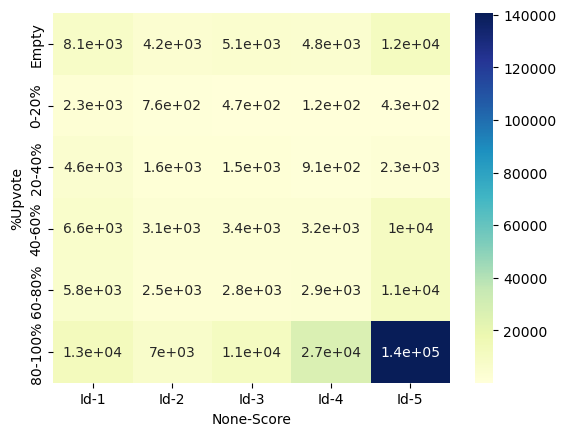

In [12]:
sns.heatmap(pivot, annot = True, cmap='YlGnBu');

## Q.Apply Bag of Words on data

In [13]:
data['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [14]:
df1 = data[data['Score'] != 3]
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [15]:
# score is the dependent variable here
X = df1['Text']

In [16]:
y_dict={1:0,2:0,4:1,5:1}
y = df1['Score'].map(y_dict)

In [17]:
#convert text to vector using NLP
from sklearn.feature_extraction.text import CountVectorizer 

In [18]:
#after countvectorizeration the feature no. changes from x to 114969
c = CountVectorizer(stop_words='english')
X_c = c.fit_transform(X)
X_c.shape

(525814, 114969)

## Q.Check Model Accuracy

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# default training size = 0.75
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression(max_iter=1000)
ml = log.fit(X_train,y_train)

In [23]:
ml.score(X_test,y_test)

0.9398725029287812

## Q.Fetch Top 20 positive words & Top 20 negative words

In [24]:
w = c.get_feature_names_out()
w

array(['00', '000', '0000', ..., 'être', 'île', 'ît'], dtype=object)

In [25]:
coef = ml.coef_.tolist()[0]
coef

[-0.4045104921437917,
 -0.2349806277079232,
 0.7650130688479836,
 -0.013268855356513653,
 6.256438011803914e-05,
 -0.06998778646891057,
 2.3312339443976707e-05,
 -0.06574080563857287,
 0.0005607250555351886,
 5.170338578455725e-06,
 0.0,
 -9.157431216370397e-05,
 0.0,
 0.03962141247706786,
 -0.8674153961462652,
 0.029104086124453386,
 1.071172371345589e-05,
 0.00511804928252063,
 0.0,
 3.5080602057194366e-07,
 -0.0007992307425265528,
 0.0,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 0.022604356514291733,
 -3.0042887194426984e-06,
 0.16958961001612732,
 1.5291027632375746e-06,
 -0.26996656593461954,
 -4.921420867968709e-06,
 2.1733642110114007e-06,
 0.0035769082735550898,
 0.09302804439127715,
 3.1242595434541716e-07,
 -0.23540705244461674,
 0.001248805485944882,
 0.00014140470915588801,
 6.16873270757308e-05,
 0.0,
 7.47078139083142e-07,
 0.004219

In [26]:
coef_data = pd.DataFrame({'Word':w, 'Coefficient':coef})
coef_data

,Word,Coefficient
0,00,-0.404510
1,000,-0.234981
2,0000,0.765013
3,000001,-0.013269
4,00001,0.000063
...,...,...
114964,çaykur,0.002136
114965,çelem,-0.162245
114966,être,0.007231
114967,île,0.000596


In [27]:
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)
coef_data

,Word,Coefficient
27198,chedder,3.421853
41175,emeraldforest,3.351335
96145,solving,3.104422
80600,pleasantly,3.047237
20268,bertie,2.938561
...,...,...
76597,overrated,-2.880812
113164,worst,-2.939393
106852,unacceptable,-2.960678
94813,skyrocketd,-2.988298


In [28]:
coef_data.head(20)

,Word,Coefficient
27198,chedder,3.421853
41175,emeraldforest,3.351335
96145,solving,3.104422
80600,pleasantly,3.047237
20268,bertie,2.938561
114056,yirgacheffe,2.569059
108387,unwrapping,2.522339
21553,blowout,2.507810
79122,perruche,2.491426
28998,cleanup,2.485841


In [29]:
coef_data.tail(20)

,Word,Coefficient
7321,allegro,-2.526720
103002,textual,-2.533767
41118,embarrassed,-2.636030
34989,deceptive,-2.644098
13533,b000sqn3og,-2.662965
56229,ick,-2.672414
88351,returnable,-2.684963
54767,holle,-2.721002
86421,redeeming,-2.754980
111257,weakest,-2.755373


## Q.Automate the previous 3 tasks

In [30]:
def text_fit(X,y,nlp_model,ml_model, coef_show=1):
    X_c = nlp_model.fit_transform(X)
    print('features:{}'.format(X_c.shape[1]))
    
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    ml=ml_model.fit(X_train,y_train)
    acc = ml.score(X_test,y_test)
    print(acc)
    
    if coef_show == 1:
        w = c.get_feature_names_out()
        coef = ml.coef_.tolist()[0]
        coef_data = pd.DataFrame({'Word':w, 'Coefficient':coef})
        coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)
        print('\n')
        print('--Top 20 Positive Words--')
        print(coef_data.head(20))
        print('\n')
        print('--Top 20 Negative Words--')
        print(coef_data.tail(20))

In [31]:
text_fit(X,y,c,log)

features:114969
0.9379250536309279


--Top 20 Positive Words--
                 Word  Coefficient
41175   emeraldforest     3.766309
27198         chedder     3.424512
80600      pleasantly     3.012987
94680          skewed     2.812335
96145         solving     2.805302
20268          bertie     2.761146
79122        perruche     2.526277
53585           hears     2.489164
57223        incurred     2.464219
105598        tribute     2.458522
55029          hooked     2.441171
93489      shippments     2.425198
114056    yirgacheffe     2.389492
113138        worries     2.370780
39072        downside     2.346560
94667       skeptical     2.345852
5865        addicting     2.320987
32209      correction     2.301746
75638          oranic     2.300034
56956   inappropriate     2.299635


--Top 20 Negative Words--
                 Word  Coefficient
80711            plot    -2.585094
94813      skyrocketd    -2.590600
58245    insufficient    -2.590864
72573          neuman    -2.607501

## Q.Automate the Predictions

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
def predict(X,y,nlp_model,ml_model):
    X_c = nlp_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    ml=ml_model.fit(X_train,y_train)
    predictions = ml.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    acc = accuracy_score(predictions, y_test)
    print(acc)

In [34]:
c = CountVectorizer()

In [35]:
predict(X,y,c,log)

[[ 15817   2496]
 [  4668 108473]]
0.9455018485553882


C:\Users\Abdul Mateen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q.Apply more NLP & ML on data

In [36]:
from sklearn.dummy import DummyClassifier

In [37]:
#count vetorization(no parameter) and dummy Classifier
text_fit(X,y,c,DummyClassifier(),0)

features:115282
0.8439149816665906


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfidf = TfidfVectorizer(stop_words='english')
text_fit(X,y,tfidf,log,0)

features:114969
0.9353690264274955


In [40]:
#tf-idf and Logistic regression
predict(X,y,tfidf,log)

[[ 14256   2241]
 [  6264 108693]]
0.9353005614131179


## Q.Data Preparation for predicting the Upvotes

In [41]:
df2 = data[data['Score']==5]
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
...,...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...,-1.0,NaN
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [42]:
data2 = df2[df2['%Upvote'].isin(['80-100%', '60-80%', '40-60%', '20-40%'])]
data2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%
...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,80-100%
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,80-100%
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,80-100%
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%


In [43]:
X = data2['Text']
X

0         I have bought several of the Vitality canned d...
8         Right now I'm mostly just sprouting this so my...
10        I don't know if it's the cactus or the tequila...
11        One of my boys needed to lose some weight and ...
14        The Strawberry Twizzlers are my guilty pleasur...
                                ...                        
568440    Indie Candy's gummies are absolutely delicious...
568444    As a foodie, I use a lot of Chinese 5 Spice po...
568445    You can make this mix yourself, but the Star A...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
Name: Text, Length: 164308, dtype: object

In [44]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '40-60%':0}
y = data2['%Upvote'].map(y_dict)
y

0         1.0
8         1.0
10        1.0
11        1.0
14        1.0
         ... 
568440    1.0
568444    1.0
568445    1.0
568451    1.0
568452    1.0
Name: %Upvote, Length: 164308, dtype: float64

In [45]:
y.value_counts()

1.0    151721
0.0     12587
Name: %Upvote, dtype: int64

## Q.Apply Tf-Idf on data

In [46]:
tfidf = TfidfVectorizer(stop_words='english')
X_c = tfidf.fit_transform(X)
X_c.shape

(164308, 69428)

In [47]:
y.value_counts()

1.0    151721
0.0     12587
Name: %Upvote, dtype: int64

## Q.Handle Imbalace data if data is Imbalance

In [48]:
# requires Tensorflow
#pip install tensorflow

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
os = RandomOverSampler()

In [51]:
X_train_res, y_train_res = os.fit_resample(X_c,y)

In [52]:
from collections import Counter

In [53]:
print('Original Dataset shape {}'.format(Counter(y)))
print('Resampled Dataset shape {}'.format(Counter(y_train_res)))

Original Dataset shape Counter({1.0: 151721, 0.0: 12587})
Resampled Dataset shape Counter({1.0: 151721, 0.0: 151721})


## Q.Do Cross validation using GridSearchCV & then do predictions

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
q = np.arange(-2,3)
q

array([-2, -1,  0,  1,  2])

In [56]:
grid = {'C' : 10.0 **q,'penalty':['l2']}

In [57]:
# n_jobs = -1 use all CPU resources
clf = GridSearchCV(estimator=log, param_grid=grid, cv = 5, n_jobs=-1, scoring='f1_macro')

In [58]:
clf.fit(X_train_res, y_train_res)

C:\Users\Abdul Mateen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l2']},
             scoring='f1_macro')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y) # since the number of features have changed, split again

In [60]:
pred = clf.predict(X_test)
pred

array([0., 1., 1., ..., 1., 1., 0.])

## Q.Checking Accuracy of cross validated model

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, pred)

array([[ 2936,   163],
       [ 3254, 34724]], dtype=int64)

In [63]:
accuracy_score(y_test, pred)

0.9168147625191713